Tranfer Leaning with TensorFLow part-2: Fine-tuning

In [ ]:
#Checking GPU
!nvidia-smi

Mon Mar 27 01:58:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    34W /  70W |   2821MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!wget https://raw.githubusercontent.com/riya0920/DeepLearning_TensorFlow/main/helper_functions.py

--2023-03-30 15:25:18--  https://raw.githubusercontent.com/riya0920/DeepLearning_TensorFlow/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8727 (8.5K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   8.52K  --.-KB/s    in 0s      

2023-03-30 15:25:18 (84.9 MB/s) - ‘helper_functions.py’ saved [8727/8727]



In [ ]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

--2023-03-30 15:26:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.128, 172.253.63.128, 142.250.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   300MB/s    in 0.5s    

2023-03-30 15:26:39 (300 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'
There are 10 directories and 0 images in '10_food_classes_10_percent/test'
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings

In [ ]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [ ]:
import tensorflow as tf
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                           label_mode = "categorical",
                                                                            batch_size = 32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                batch_size = 32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
for images, labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[151.9949     103.9949      18.994898  ]
   [146.54591    100.54592     12.5459175 ]
   [149.38776    103.38776     15.3877535 ]
   ...
   [ 93.21925     91.08151     15.377499  ]
   [ 81.58661     83.392746     7.096839  ]
   [ 80.90313     83.90313      3.3622873 ]]

  [[158.81633    112.81632     24.816326  ]
   [154.49998    108.5         20.499998  ]
   [156.40305    110.61735     21.974485  ]
   ...
   [109.52536    106.18357     26.897896  ]
   [ 95.112045    93.525345    16.254902  ]
   [ 80.275635    83.035904     0.709246  ]]

  [[157.80103    111.80102     23.80102   ]
   [158.21428    112.42857     23.785713  ]
   [160.2551     115.34694     24.301018  ]
   ...
   [133.3772     128.16293     46.520138  ]
   [109.88784    107.24501     25.658245  ]
   [ 95.71369     96.55561      9.871913  ]]

  ...

  [[122.41836     96.98983     15.204097  ]
   [109.907974    84.907974     2.9079766 ]
   [ 98.24474     73.24474      0.        ]
   ...
   [200.11754    166.454

In [ ]:
# Functional API!!
#1. Createbase model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
# 2.Freeze the base model
base_model.trainable = False
# 3. Create input into our models
inputs = tf.keras.layers.Input(shape = (224,224,3),name = "input_layer")

# 4. If using TesNet50V2 you will need to normalize inputs
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. pass the inputs to the base models
x = base_model(inputs)
print(f"Shape after passinf inputs through base model {x.shape}")

#6. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after globalaveragepooling2D: {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)

# 8. Combining inputs with the outputs into a model
model_0 = tf.keras.Model(inputs,outputs)

# 9. Compile the model
model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


#10. Fit the model
history_0 = model_0.fit(train_data_10_percent,
                        epochs = 5,
                        steps_per_epoch = len(train_data_10_percent),
                        validation_data = test_data,
                        validation_steps = int(0.25*len(test_data)),
                        callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                                 experiment_name = "10_percent_feature_extraction")])


Shape after passinf inputs through base model (None, 7, 7, 1280)
Shape after globalaveragepooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20230327-015857
Epoch 1/5
24/24 [==============================] - 13s 259ms/step - loss: 1.9218 - accuracy: 0.3533 - val_loss: 1.3414 - val_accuracy: 0.6891
Epoch 2/5
24/24 [==============================] - 5s 176ms/step - loss: 1.1338 - accuracy: 0.7453 - val_loss: 0.8640 - val_accuracy: 0.8158
Epoch 3/5
24/24 [==============================] - 4s 134ms/step - loss: 0.8138 - accuracy: 0.8160 - val_loss: 0.6990 - val_accuracy: 0.8421
Epoch 4/5
24/24 [==============================] - 5s 178ms/step - loss: 0.6574 - accuracy: 0.8480 - val_loss: 0.6196 - val_accuracy: 0.8405
Epoch 5/5
24/24 [==============================] - 5s 159ms/step - loss: 0.5519 - accuracy: 0.8800 - val_loss: 0.5422 - val_accuracy: 0.8766


In [ ]:
#Evaluate on the full test data
model_0.evaluate(test_data)

79/79 [==============================] - 7s 71ms/step - loss: 0.5544 - accuracy: 0.8632


[0.5544157028198242, 0.8632000088691711]

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_3
1 rescaling_4
2 normalization_2
3 rescaling_5
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activati

In [ ]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_4 (Rescaling)        (None, None, None,   0           ['input_3[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_2 (Normalization  (None, None, None,   7          ['rescaling_4[0][0]']            
 )                              3)                                                   

In [ ]:
model_0.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


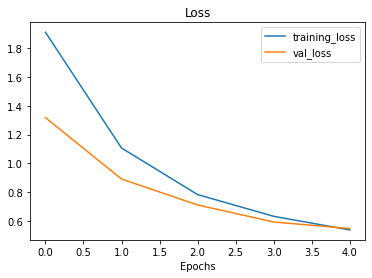

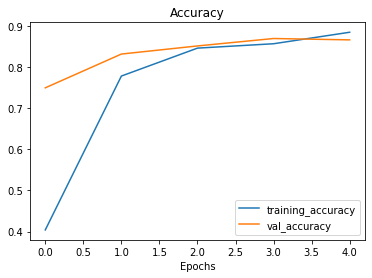

In [ ]:
plot_loss_curves(history_0)

In [ ]:
 #Checking what the GlobalAveragePooling2D does
 import tensorflow as tf
 tf.random.set_seed(42)
 input_shape = (1,4,4,3)
 input_tensor = tf.random.normal(input_shape)
 input_tensor

 x = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
 x,x.shape

(<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>,
 TensorShape([1, 3]))

In [ ]:
x = tf.keras.layers.GlobalMaxPool2D()(input_tensor)
x

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.9058464, 1.1603122, 1.6994323]], dtype=float32)>

In [ ]:
input_tensor

<tf.Tensor: shape=(1, 4, 4, 3), dtype=float32, numpy=
array([[[[ 0.3274685 , -0.8426258 ,  0.3194337 ],
         [-1.4075519 , -2.3880599 , -1.0392479 ],
         [-0.5573232 ,  0.539707  ,  1.6994323 ],
         [ 0.28893656, -1.5066116 , -0.2645474 ]],

        [[-0.59722406, -1.9171132 , -0.62044144],
         [ 0.8504023 , -0.40604794, -3.0258412 ],
         [ 0.9058464 ,  0.29855987, -0.22561555],
         [-0.7616443 , -1.8917141 , -0.93847126]],

        [[ 0.77852213, -0.47338897,  0.97772694],
         [ 0.24694404,  0.20573747, -0.5256233 ],
         [ 0.32410017,  0.02545409, -0.10638497],
         [-0.6369475 ,  1.1603122 ,  0.2507359 ]],

        [[-0.41728503,  0.4012578 , -1.4145443 ],
         [-0.5931857 , -1.6617213 ,  0.33567193],
         [ 0.10815629,  0.23479682, -0.56668764],
         [-0.35819843,  0.88698614,  0.52744764]]]], dtype=float32)>

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2023-03-30 13:51:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  16.2MB/s    in 9.8s    

2023-03-30 13:52:06 (13.0 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
unzip_data("10_food_classes_1_percent.zip")

In [ ]:

train_dir = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'
There are 10 directories and 0 images in '10_food_classes_1_percent/test'
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'
There are 

In [ ]:
#Adding data augmentation right into our models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode = "categorical",

                                                                 image_size = (224,224))
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size= (224,224))

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
import tensorflow as tf
data_augmentation = tf.keras.Sequential([
  preprocessing.RandomFlip('horizontal'),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomRotation(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNet
], name="data_augmentation")


Text(0.5, 1.0, 'steak')

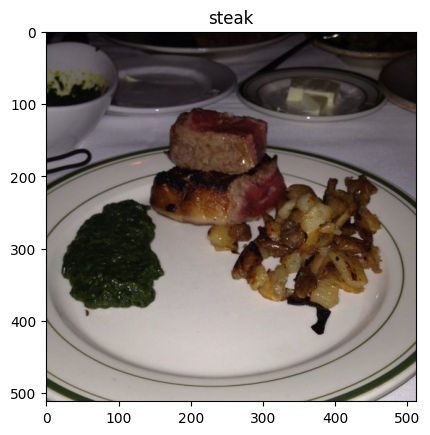

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_path = target_dir + "/" + random_image

img = mimg.imread(random_path)
plt.imshow(img)
plt.title(target_class)

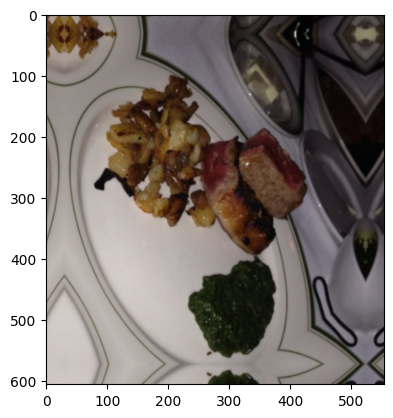

In [ ]:
#Now lets passs it to data augmentation
augmented_img = data_augmentation(img,training = True)
plt.figure()
plt.imshow(augmented_img/255.)

In [ ]:
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape,name="Input_layer")
x = data_augmentation(inputs)
x = base_model(inputs,training=False)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)

model_1 = keras.Model(inputs,outputs)

model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_1 = model_1.fit(train_data_1_percent,
                        epochs = 5,
                        steps_per_epoch = len(train_data_1_percent),
                        validation_data = test_data,
                        validation_steps = int(0.25 * len(test_data)),
                        callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                                  experiment_name = "1_percent_feature_extraction")])

Saving TensorBoard log files to: transfer_learning/1_percent_feature_extraction/20230330-155352
Epoch 1/5
24/24 [==============================] - 20s 230ms/step - loss: 1.8421 - accuracy: 0.4440 - val_loss: 1.2610 - val_accuracy: 0.7451
Epoch 2/5
24/24 [==============================] - 4s 143ms/step - loss: 1.0430 - accuracy: 0.7787 - val_loss: 0.8559 - val_accuracy: 0.8125
Epoch 3/5
24/24 [==============================] - 5s 166ms/step - loss: 0.7480 - accuracy: 0.8307 - val_loss: 0.7053 - val_accuracy: 0.8322
Epoch 4/5
24/24 [==============================] - 5s 178ms/step - loss: 0.6045 - accuracy: 0.8640 - val_loss: 0.6074 - val_accuracy: 0.8503
Epoch 5/5
24/24 [==============================] - 5s 179ms/step - loss: 0.5114 - accuracy: 0.8840 - val_loss: 0.5670 - val_accuracy: 0.8602


In [ ]:
model_1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_3   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
model_1.evaluate(test_data)

79/79 [==============================] - 8s 85ms/step - loss: 1.7129 - accuracy: 0.5300


[1.712876319885254, 0.5299999713897705]

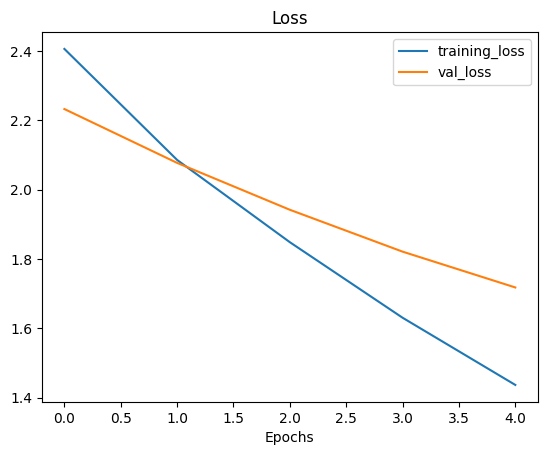

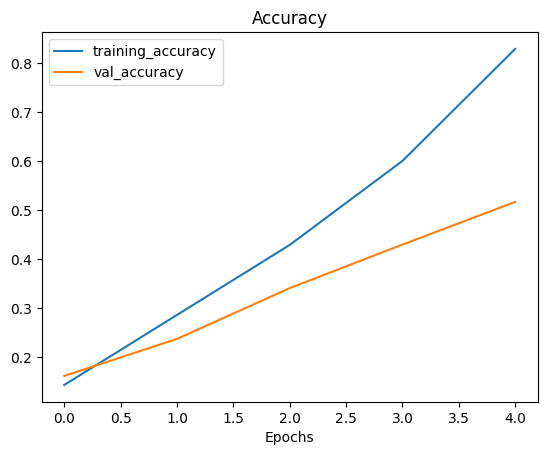

In [ ]:
plot_loss_curves(history_1)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-03-30 15:29:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.128, 142.251.111.128, 142.251.163.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   140MB/s    in 1.1s    

2023-03-30 15:29:24 (140 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [ ]:
unzip_data("10_food_classes_10_percent.zip")

In [ ]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [ ]:
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                            label_mode = "categorical",
                                                                            image_size = (224,224))
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                           label_mode = "categorical",
                                                                           image_size = (224,224))


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False
inputs = tf.keras.layers.Input(shape = input_shape)
x = data_augmentation(inputs)
x = base_model(x,training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(10,activation="softmax")(x)
model_2 = keras.Model(inputs,outputs)

model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


In [ ]:
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt" # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=False, # set to True to save only the best model instead of a model every epoch
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)


In [ ]:
history_2 = model_2.fit(train_data_10_percent,
                        epochs= 5,
                        validation_data = test_data,
                        callbacks = [create_tensorboard_callback("transfer_learning","Model_2"),
                                     checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/Model_2/20230330-171515
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 0.4949 - accuracy: 0.8400
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 15s 591ms/step - loss: 0.4949 - accuracy: 0.8400 - val_loss: 0.5070 - val_accuracy: 0.8376
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 0.2741 - accuracy: 0.9187
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 15s 611ms/step - loss: 0.2741 - accuracy: 0.9187 - val_loss: 0.5457 - val_accuracy: 0.8328
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.1695 - accuracy: 0.9440
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 14s 583ms/step - loss: 0.1695 - accuracy: 0.9440 - val_loss: 0.5137 - val_accuracy: 0.8384
Epoch 4/5
24/

In [ ]:
model_2_results = model_2.evaluate(test_data)

79/79 [==============================] - 6s 74ms/step - loss: 0.4898 - accuracy: 0.8644


In [ ]:
model_2.load_weights(checkpoint_path)
model_2_loaded_results = model_2.evaluate(test_data)

79/79 [==============================] - 7s 79ms/step - loss: 0.5003 - accuracy: 0.8536


In [ ]:
model_2_results == model_2_loaded_results

True

MODEL - 3 Fine-tuned of MODEL - 2

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-10]:
  layer.trainable = False

model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                metrics = ["accuracy"])

In [ ]:
for layer in model_2.layers[2].layers:
  print(layer.name,layer.trainable)

input_13 False
rescaling_14 False
normalization_7 False
rescaling_15 False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_dwconv False
block2b_bn False
block2b_activation False
block2b_se_squeeze False
block2b_se_reshape False
block2b_se_reduce False
block2b_se_expand False
block2b_se_excite False
block

In [ ]:
history_2_finetuned = model_2.fit(train_data_10_percent,
                                  epochs = 10,
                                  validation_data = test_data,
                                  validation_steps = int(0.25*len(test_data)),
                                  initial_epoch = history_2.epoch[-1],
                                  callbacks = [create_tensorboard_callback("transfer_learning","Model_2_finetuned")])

Saving TensorBoard log files to: transfer_learning/Model_2_finetuned/20230330-165205
Epoch 5/10


24/24 [==============================] - 27s 597ms/step - loss: 0.4363 - accuracy: 0.8773 - val_loss: 0.4526 - val_accuracy: 0.8618
Epoch 6/10
24/24 [==============================] - 12s 499ms/step - loss: 0.3718 - accuracy: 0.8987 - val_loss: 0.4732 - val_accuracy: 0.8602
Epoch 7/10
24/24 [==============================] - 11s 448ms/step - loss: 0.2980 - accuracy: 0.9160 - val_loss: 0.4568 - val_accuracy: 0.8734
Epoch 8/10
24/24 [==============================] - 11s 448ms/step - loss: 0.2841 - accuracy: 0.9160 - val_loss: 0.4546 - val_accuracy: 0.8635
Epoch 9/10
24/24 [==============================] - 12s 492ms/step - loss: 0.2631 - accuracy: 0.9267 - val_loss: 0.4379 - val_accuracy: 0.8701
Epoch 10/10
24/24 [==============================] - 10s 402ms/step - loss: 0.2285 - accuracy: 0.9400 - val_loss: 0.4583 - val_accuracy: 0.8602


In [ ]:
model_2_finetuned = model_2.evaluate(test_data)

79/79 [==============================] - 7s 86ms/step - loss: 0.4248 - accuracy: 0.8620


In [ ]:
model_2_results,model_2_finetuned

([0.4897896349430084, 0.8644000291824341],
 [0.424838125705719, 0.8619999885559082])

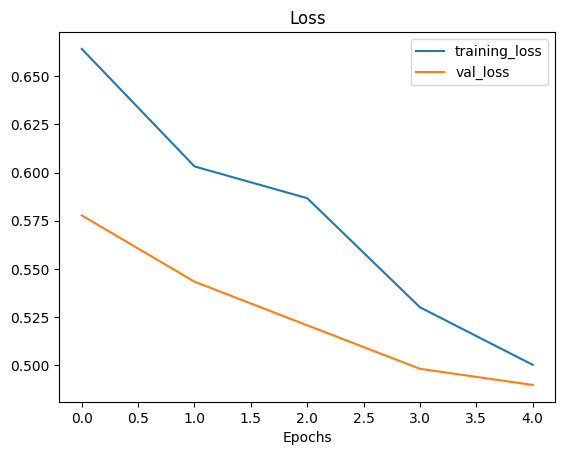

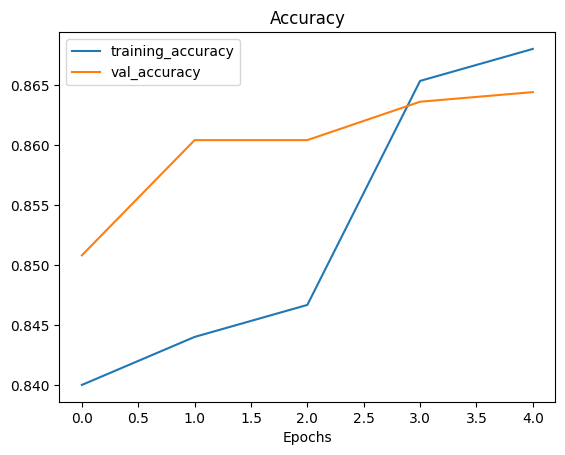

In [ ]:
plot_loss_curves(history_2)

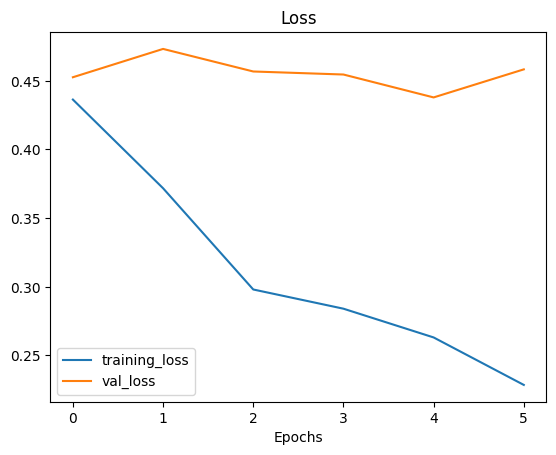

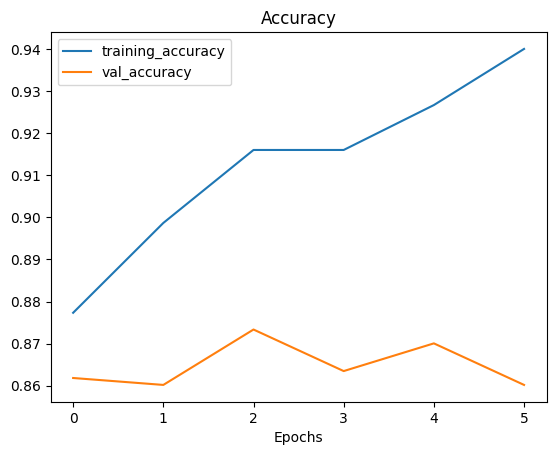

In [ ]:
plot_loss_curves(history_2_finetuned)

In [ ]:
import matplotlib.pyplot as plt
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.8399999737739563, 0.843999981880188, 0.846666693687439, 0.8653333187103271, 0.8679999709129333, 0.8773333430290222, 0.8986666798591614, 0.9160000085830688, 0.9160000085830688, 0.9266666769981384, 0.9399999976158142]


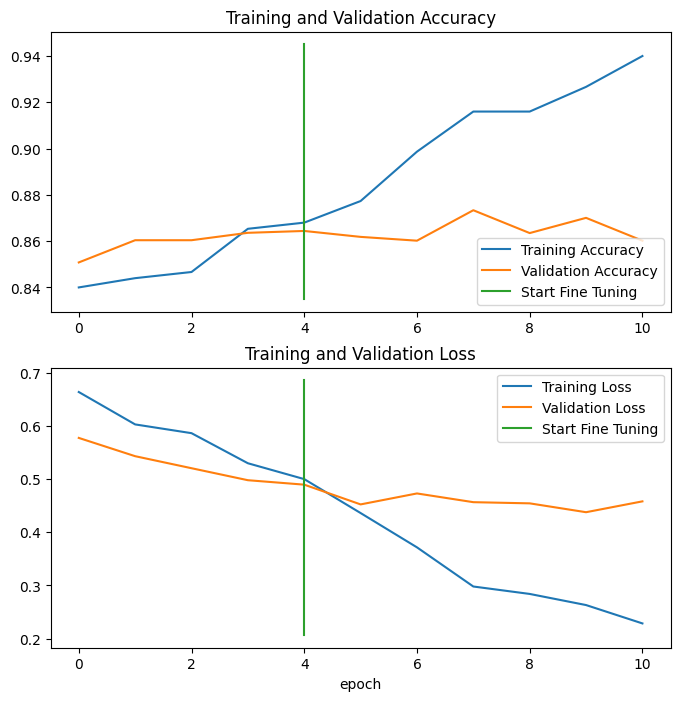

In [ ]:
compare_historys(original_history=history_2,
                 new_history=history_2_finetuned,
                 initial_epochs=5)


MODEL - 4 (100% TRAINING DATA)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-03-30 17:03:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   171MB/s    in 2.9s    

2023-03-30 17:03:44 (171 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
unzip_data("10_food_classes_all_data.zip")

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode = "categorical",
                                                                 image_size = (224,224))
test_data  = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = "categorical",
                                                                image_size = (224,224))

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
model_2.load_weights(checkpoint_path)
model_2_loaded_results = model_2.evaluate(test_data)

79/79 [==============================] - 7s 80ms/step - loss: 0.5003 - accuracy: 0.8536


In [ ]:
model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                metrics = ["accuracy"])

history_4 = model_2.fit(train_data,
                        epochs = 10,
                        validation_data = test_data,
                        callbacks = [create_tensorboard_callback("transfer_learning","Model_4")],
                        initial_epoch = history_2.epoch[-1])

Saving TensorBoard log files to: transfer_learning/Model_4/20230330-172236
Epoch 5/10


235/235 [==============================] - 98s 367ms/step - loss: 0.5699 - accuracy: 0.8268 - val_loss: 0.3229 - val_accuracy: 0.8912
Epoch 6/10
235/235 [==============================] - 83s 353ms/step - loss: 0.4629 - accuracy: 0.8513 - val_loss: 0.2899 - val_accuracy: 0.9028
Epoch 7/10
235/235 [==============================] - 80s 338ms/step - loss: 0.4061 - accuracy: 0.8700 - val_loss: 0.2783 - val_accuracy: 0.9088
Epoch 8/10
235/235 [==============================] - 78s 329ms/step - loss: 0.3785 - accuracy: 0.8781 - val_loss: 0.2701 - val_accuracy: 0.9144
Epoch 9/10
235/235 [==============================] - 76s 319ms/step - loss: 0.3319 - accuracy: 0.8959 - val_loss: 0.2724 - val_accuracy: 0.9116
Epoch 10/10
235/235 [==============================] - 70s 294ms/step - loss: 0.3180 - accuracy: 0.8932 - val_loss: 0.2573 - val_accuracy: 0.9152


6
12
[0.8773333430290222, 0.8986666798591614, 0.9160000085830688, 0.9160000085830688, 0.9266666769981384, 0.9399999976158142, 0.8267999887466431, 0.8513333201408386, 0.8700000047683716, 0.8781333565711975, 0.8958666920661926, 0.8931999802589417]


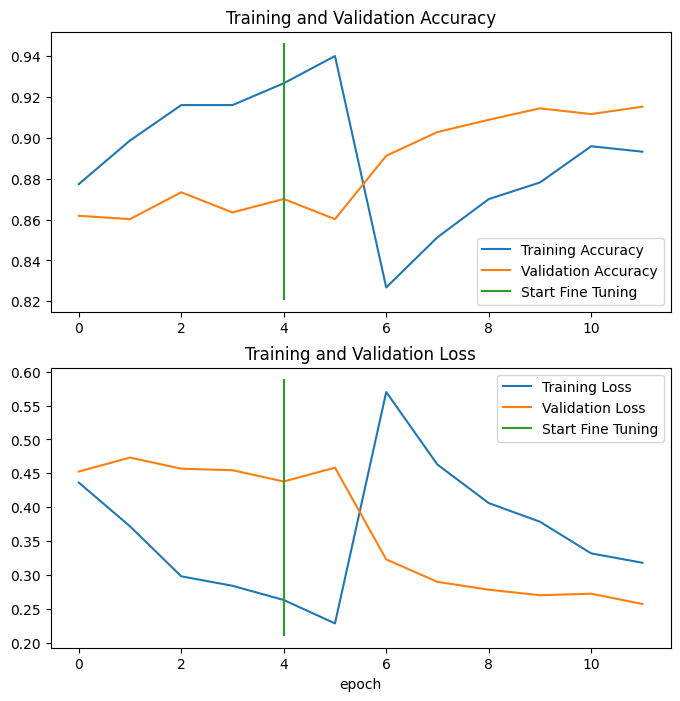

In [ ]:
compare_historys(history_2_finetuned,history_4)